# Local Alain

Epoch 1/5


c:\Users\aesca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7257 - loss: 0.8905 - val_accuracy: 0.9160 - val_loss: 0.2862
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9025 - loss: 0.3074 - val_accuracy: 0.9375 - val_loss: 0.2131
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9275 - loss: 0.2462 - val_accuracy: 0.9410 - val_loss: 0.1975
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9424 - loss: 0.1983 - val_accuracy: 0.9405 - val_loss: 0.1949
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9482 - loss: 0.1735 - val_accuracy: 0.9475 - val_loss: 0.1898
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report (Local Model):
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       175
           1       0.98      0.99      0.99       234
           2       0.95      0.96      0.95       219
           3       0.90      0.97      0.93       207
           4       0.95     

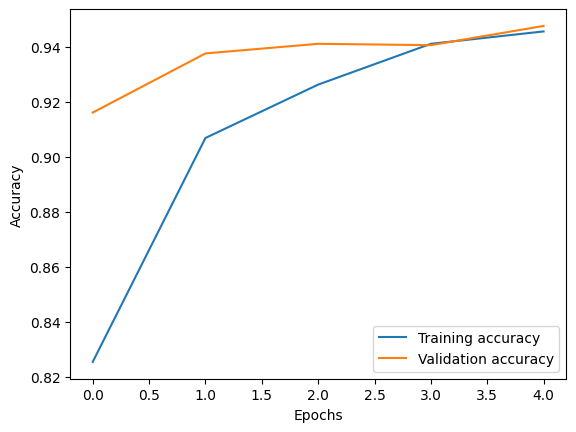

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from TheModel import build

# Cargar el archivo .npz con una parte de MNIST
parte = 'mnist_parte_5'
data = np.load(f'{parte}.npz')

# Extraer las imágenes y etiquetas de los datos
x_train = data['images']
y_train = data['labels']

# Cargar el conjunto de test completo del MNIST original
(x_full_test, y_full_test) = mnist.load_data()[1]
n_test_samples = len(x_full_test) 
split_size = n_test_samples // 5
x_test, y_test = x_full_test[:split_size], y_full_test[:split_size]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Redimensionar las imágenes para que coincidan con la entrada del modelo (28x28)
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

# Crear el modelo usando la clase build_it desde TheModel.py
local_model = build.build_it()

# Training loop
history = local_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluación del modelo
y_pred = local_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Mostrar el reporte de clasificación
print("Classification Report (Local Model):")
print(classification_report(y_test, y_pred_classes))

# Graficar las curvas de aprendizaje
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Guardar el modelo entrenado
local_model.save(f'{parte}.keras')
